11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 61s 31ms/step - accuracy: 0.8964 - loss: 0.3356 - val_accuracy: 0.9776 - val_loss: 0.0665
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 78s 29ms/step - accuracy: 0.9826 - loss: 0.0552 - val_accuracy: 0.9882 - val_loss: 0.0357
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 29ms/step - accuracy: 0.9899 - loss: 0.0326 - val_accuracy: 0.9875 - val_loss: 0.0421
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 29ms/step - accuracy: 0.9930 - loss: 0.0250 - val_accuracy: 0.9888 - val_loss: 0.0339
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 29ms/step - accuracy: 0.9946 - loss: 0.0157 - val_accuracy: 0.9880 - val_loss: 0.0357


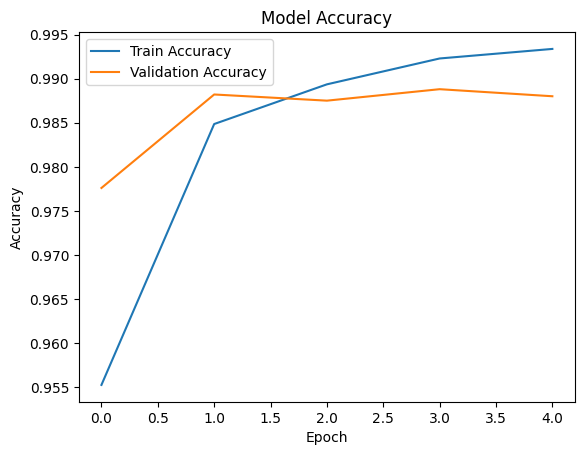

In [8]:
!pip install tensorflow matplotlib

import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
# Load MNIST digits data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Normalize (scale) data between 0 and 1
x_train = x_train / 255.0
x_test = x_test / 255.0

# Reshape for CNN input (28x28x1)
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')  # 10 classes
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()
